# Perimeter Calculation

In this notebook we will learn how to extract object boundaries from instance segmentations. We will also examine some pitfalls of accurately calculating perimeters in discretized datasets.

In [1]:
from __future__ import division, print_function

import numpy as np
from skimage.io import imread, imshow
from skimage.segmentation import find_boundaries, clear_border
from skimage.morphology import skeletonize
from scipy.ndimage import label, binary_fill_holes

import matplotlib.pyplot as plt
%matplotlib inline

# Load Data

As with notebook '00_intensity_and_size' the images in this notebook were generated using notebooks from last week's lecture.

/Users/ryan/mambaforge/envs/devbio-napari-env/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


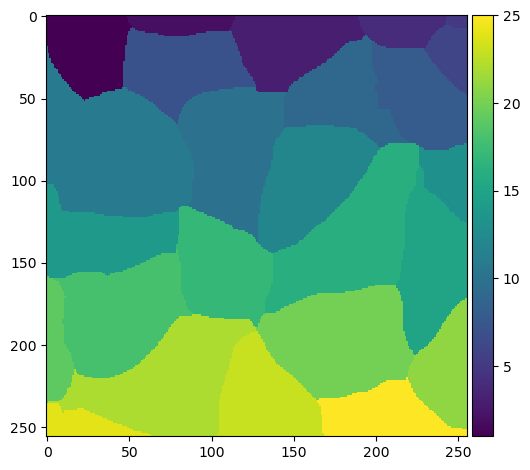

In [2]:
membrane_labels = imread('data/membrane_labels.tif')
imshow(membrane_labels)

# Object Boundaries

Here we will use a combination of functions to extract and index the boundaries of all of the cells in the watershed result. With these images, we will perform a perimeter calculation on a selected cell.

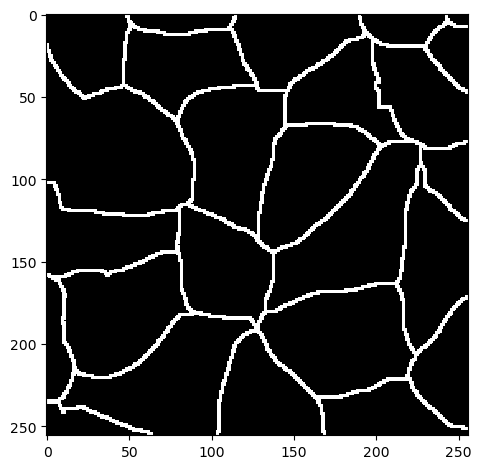

In [3]:
boundary_image = find_boundaries(membrane_labels, connectivity = 2) #this function returns a boolean image
imshow(boundary_image)

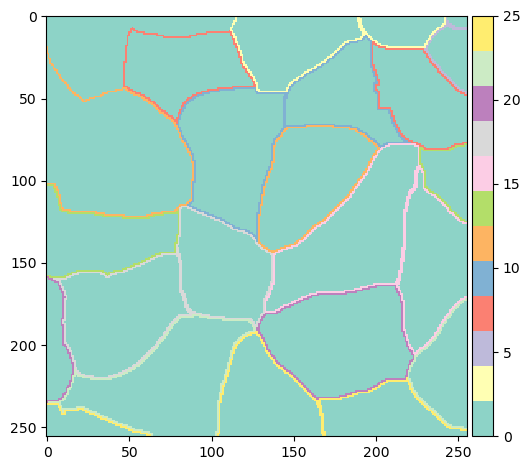

In [4]:
indexed_boundary_image = boundary_image.astype(int)
indexed_boundary_image[indexed_boundary_image > 0] = membrane_labels[indexed_boundary_image > 0]
imshow(indexed_boundary_image, cmap = 'Set3') #this colormap makes it visually separate the boundaries of adjacent cells

Isolate the boundary of a single cell using the boolean indexing operator 'not equal.'

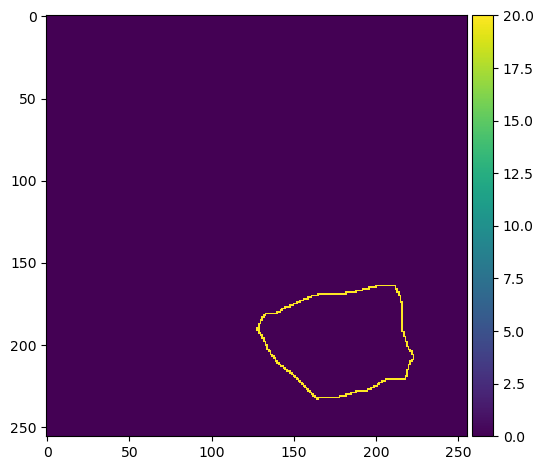

In [5]:
boundary_object_20 = np.copy(indexed_boundary_image)
boundary_object_20[boundary_object_20 != 20] = 0
imshow(boundary_object_20)

Apply a skeletonization function to the isolated boundary to ensure that the perimeter width is a single pixel at all positions.

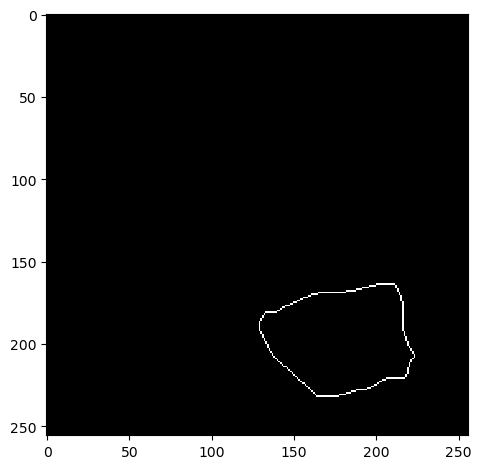

In [6]:
boundary_object_20 = skeletonize(boundary_object_20.astype(bool)) #inputs for this function must be boolean
imshow(boundary_object_20)

In the next three cells, we will perform a little trick with the $N_{4}$ neighborhood kernel and connected component labeling to identify which pixels in the boundary should contribute $\sqrt{2}$. 

`np.where` is a useful function that lists the coordinates that a labeled object occupies in the image. You can read the doucmentation here:

<https://numpy.org/doc/stable/reference/generated/numpy.where.html>

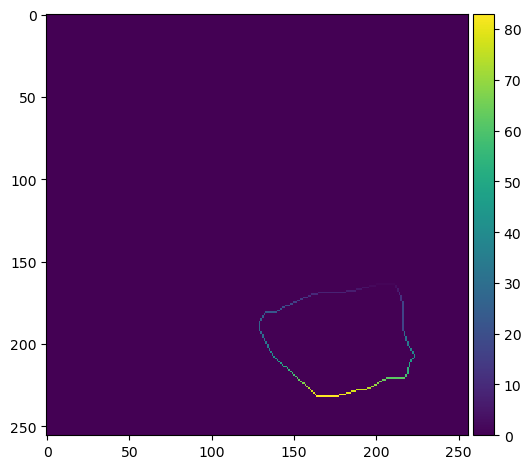

In [7]:
edge_kernel = np.array([[0, 1, 0], 
                        [1, 1, 1], 
                        [0, 1, 0]])

edge_connected_pixels, n_edges = label(boundary_object_20, structure = edge_kernel)
imshow(edge_connected_pixels)

In [8]:
edge_lengths = np.zeros((n_edges, 1), dtype = float)

for i in range(n_edges):
    
    n_pixels = len(np.where(edge_connected_pixels == i+1)[0])
    
    if n_pixels == 1:
        edge_lengths[i,...] = np.sqrt(2)
        
    elif n_pixels > 1:
        edge_lengths[i,...] = n_pixels

In [9]:
perimeter = np.sum(edge_lengths)
perimeter

252.59797974644667

# Exercise

Thinking back to last week's lecture on morphological operations, first use the function `clear_border` to remove incomplete objects in the nuclear segmentation result shown below. Second, use `binary_fill_holes` to 'clean up' the remaining segmented objects. Finally, select an object you want to extract the boundaries of and determine its perimeter.

Here are the documentation links for the functions if you would like to remind yourself of their input and output requirements:

<https://scikit-image.org/docs/stable/api/skimage.segmentation.html#skimage.segmentation.clear_border>

<https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.binary_fill_holes.html#scipy.ndimage.binary_fill_holes>

Hint #1: use the $N_{8}$ neighborhood as the `structure` input for `binary_fill_holes`. This can be written as `np.ones((3,3))`.

Hint #2: you can use the function `np.unique` to see all of the values present in the array.

If you are feeling ambitious, you can write a for loop that will perform these operations for all of the objects in the image :)

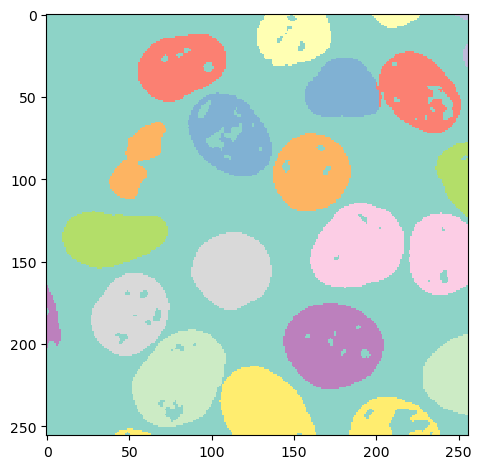

In [10]:
nuclei_labels = imread('data/nuclei_labels.tif')
imshow(nuclei_labels, cmap = 'Set3')

# Optional Exercise Extensions!

Examine the documentation and example workflows from `pyclesperanto_prototype` and try to identify one line functions that can replace some of the multiline blocks shown in this notbook. 

<https://github.com/clEsperanto/pyclesperanto_prototype>

Furthermore, if you are aware of 'list comprehension', you can attempt to replace the for loop used to calculate perimeter with a single line :)

In [ ]:
# list pyclesperanto functions here & convert the cell to markdown :)

In [ ]:
# attempt list comprehension here :)